In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get data

In [2]:
team_stats = pd.read_csv('Baseball_TeamStats.csv')
player_stats = pd.read_csv('BattersAggregate.csv')

In [3]:
player_stats = player_stats.dropna()
team_stats = team_stats.dropna()

In [4]:
# Limit analysis to players with over 100 plate appearances
player_stats = player_stats[player_stats['PA'] > 100]

In [5]:
team_stats.head()

,Tm,BatAge,G,Wins,PA,AB,R,H,2B,3B,...,CS,BB,SO,BA,OBP,SLG,OPS,HBP,WAR,Salary
0,ARI,28.7,162.0,85.0,6315.0,5633.0,813.0,1419.0,288.0,40.0,...,14.0,540.0,1360.0,0.252,0.323,0.434,0.757,70.0,25.2,119116666.0
1,ATL,28.0,162.0,97.0,6302.0,5560.0,855.0,1432.0,277.0,29.0,...,28.0,619.0,1467.0,0.258,0.336,0.452,0.789,60.0,23.4,130561667.0
2,BAL,26.5,162.0,54.0,6189.0,5596.0,729.0,1379.0,252.0,25.0,...,30.0,462.0,1435.0,0.246,0.310,0.415,0.725,71.0,10.8,82696100.0
3,BOS,27.3,162.0,84.0,6475.0,5770.0,901.0,1554.0,345.0,27.0,...,30.0,590.0,1382.0,0.269,0.340,0.466,0.806,49.0,24.6,207205000.0
4,CHC,27.7,162.0,84.0,6195.0,5461.0,814.0,1378.0,270.0,26.0,...,24.0,581.0,1460.0,0.252,0.331,0.452,0.783,83.0,21.0,204630215.0


In [6]:
player_stats.head()

,Name,Pos,TM,Age,G,PA,AB,R,H,2B,...,BB,SO,BA,OBP,SLG,OPS,Height,Weight,BMI,Salary
0,A.J. Pollock,CF,LAD,31,86,342,308,49,82,15,...,23,74,0.266,0.327,0.468,0.795,73,212,28.0,4000000.0
3,Aaron Judge,RF,NYY,27,102,447,378,75,103,18,...,64,141,0.272,0.381,0.540,0.921,79,282,31.8,684300.0
7,Adalberto Mondesi,SS,KCR,23,102,443,415,58,109,20,...,19,132,0.263,0.291,0.424,0.715,73,190,25.1,576000.0
9,Adam Eaton,RF,WAS,30,151,656,566,103,158,25,...,65,106,0.279,0.365,0.428,0.792,69,176,26.0,8400000.0
10,Adam Engel,CF,CHW,27,89,248,227,26,55,10,...,14,78,0.242,0.304,0.383,0.687,74,210,27.0,571000.0


<AxesSubplot:xlabel='Salary', ylabel='Count'>

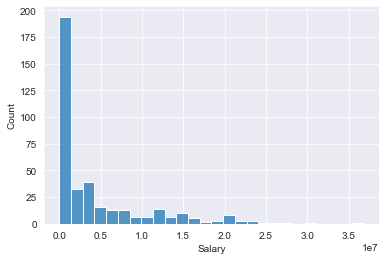

In [7]:
sns.set_style('darkgrid')
sns.histplot(data=player_stats, x='Salary')

## Big difference in salaries, most are under a million <br> Let's take a closer look

In [8]:
import collections

In [9]:
salary_counts = collections.Counter(player_stats['Salary'])

In [10]:
sorted(salary_counts.items())

[(10000.0, 1),
 (59320.0, 1),
 (100000.0, 3),
 (550000.0, 1),
 (555000.0, 43),
 (556300.0, 2),
 (556400.0, 1),
 (557000.0, 2),
 (557125.0, 1),
 (557400.0, 1),
 (557500.0, 4),
 (557650.0, 1),
 (557800.0, 1),
 (558000.0, 1),
 (558125.0, 1),
 (558400.0, 1),
 (558500.0, 2),
 (558600.0, 1),
 (558700.0, 1),
 (559000.0, 2),
 (559400.0, 1),
 (559800.0, 1),
 (560000.0, 13),
 (560100.0, 1),
 (560400.0, 2),
 (561000.0, 1),
 (561420.0, 1),
 (561500.0, 2),
 (562000.0, 2),
 (562400.0, 1),
 (563300.0, 1),
 (563500.0, 1),
 (564000.0, 2),
 (565000.0, 5),
 (565500.0, 1),
 (565700.0, 1),
 (567000.0, 1),
 (567100.0, 1),
 (567225.0, 1),
 (567500.0, 1),
 (567700.0, 1),
 (567714.0, 1),
 (568000.0, 1),
 (568600.0, 1),
 (569500.0, 2),
 (570000.0, 3),
 (570300.0, 1),
 (570400.0, 1),
 (570500.0, 1),
 (571000.0, 1),
 (571765.0, 1),
 (572000.0, 1),
 (572500.0, 2),
 (573200.0, 1),
 (574800.0, 1),
 (575000.0, 6),
 (575500.0, 2),
 (576000.0, 1),
 (577000.0, 1),
 (577100.0, 1),
 (578000.0, 1),
 (578300.0, 2),
 (578400

## Vast amount of contracts are around the league minimum, aka, rookie contracts

### Let's split the dataset accordingly

In [11]:
rookie_contracts = player_stats[player_stats['Salary'] < 700000].copy()

In [12]:
rookie_contracts.shape

(175, 25)

In [13]:
veteran_contracts = player_stats[player_stats['Salary'] >= 700000].copy()

In [14]:
veteran_contracts.shape

(204, 25)

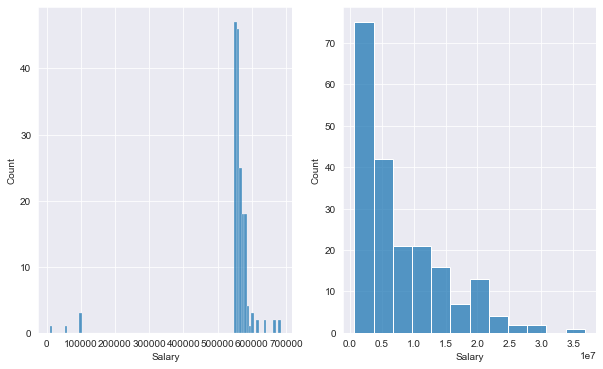

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 6)
sns.histplot(data=rookie_contracts, x='Salary', ax=ax1)
sns.histplot(data=veteran_contracts, x='Salary', ax=ax2)
plt.show()

# Create metric for run generation

In [16]:
team_stats.columns

Index(['Tm', 'BatAge', 'G', 'Wins', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'HBP', 'WAR',
       'Salary'],
      dtype='object')

In [17]:
team_stats_limited = team_stats[['PA', 'R', 'H', '2B', '3B', 'HR',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'HBP']]

## Create model to determine how runs are generated
## Use team stats to see how stats factor in overall team runs rather than individual stats up to chance such as R or RBI

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [19]:
x_train = team_stats_limited[['PA', 'H', '2B', '3B', 'HR',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS']]
y_train = team_stats_limited[['R']]

In [20]:
x_test = player_stats[['PA', 'H', '2B', '3B', 'HR',
       'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS']]
y_test = player_stats[['R']]

In [21]:
xScaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = xScaler.transform(x_train)
yScaler = preprocessing.StandardScaler().fit(y_train)
y_scaled = yScaler.transform(y_train)

In [22]:
rf = RandomForestRegressor()
rf.fit(x_scaled, y_scaled)

<ipython-input-22-9b5b084d4fc1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_scaled, y_scaled)


RandomForestRegressor()

## Apply model to individual stats to create a metric for performance
### Raw metric is meaningless, but used comparitively

In [23]:
y_pred = rf.predict(x_test).round(3)
list(y_pred)

[0.778,
 0.839,
 0.756,
 0.782,
 0.725,
 0.727,
 0.715,
 0.721,
 0.721,
 0.645,
 0.751,
 0.78,
 0.726,
 0.878,
 0.765,
 0.721,
 0.78,
 0.766,
 0.646,
 0.782,
 0.502,
 0.778,
 0.895,
 0.842,
 0.759,
 0.792,
 0.53,
 0.487,
 0.842,
 0.764,
 0.732,
 0.714,
 0.78,
 0.715,
 0.464,
 0.383,
 0.713,
 0.833,
 0.827,
 0.727,
 0.533,
 0.639,
 0.819,
 0.745,
 0.79,
 0.778,
 0.772,
 0.782,
 0.736,
 0.836,
 0.817,
 0.513,
 0.709,
 0.79,
 0.76,
 0.64,
 0.823,
 0.413,
 0.826,
 0.76,
 0.782,
 0.727,
 0.709,
 0.707,
 0.871,
 0.501,
 0.709,
 0.382,
 0.784,
 0.778,
 0.778,
 0.99,
 0.755,
 0.9,
 0.651,
 0.74,
 0.811,
 0.764,
 0.709,
 0.639,
 0.452,
 0.761,
 0.529,
 0.76,
 0.639,
 0.738,
 0.821,
 0.727,
 0.867,
 0.77,
 0.658,
 0.545,
 0.763,
 0.645,
 0.728,
 0.754,
 0.842,
 0.702,
 0.778,
 0.794,
 0.725,
 0.725,
 0.786,
 0.79,
 0.513,
 0.798,
 0.729,
 0.501,
 0.775,
 0.727,
 0.721,
 0.742,
 0.782,
 0.819,
 0.488,
 0.839,
 0.764,
 0.89,
 0.505,
 0.819,
 0.747,
 0.768,
 0.752,
 0.766,
 0.727,
 0.798,
 0.875,
 

In [24]:
player_stats['RG'] = list(y_pred)

In [25]:
player_stats.sort_values(by=['RG'], ascending=False)

,Name,Pos,TM,Age,G,PA,AB,R,H,2B,...,SO,BA,OBP,SLG,OPS,Height,Weight,BMI,Salary,RG
122,Christian Yelich,RF,MIL,27,130,580,489,100,161,29,...,118,0.329,0.429,0.671,1.100,75,195,24.4,9750000.0,0.990
437,Mike Trout,CF,LAA,27,134,600,470,110,137,27,...,120,0.291,0.438,0.645,1.083,74,235,30.2,36833333.0,0.960
628,Yordan Alvarez,DH,HOU,22,87,369,313,58,98,26,...,94,0.313,0.412,0.655,1.067,77,225,26.7,555000.0,0.958
125,Cody Bellinger,RF,LAD,23,156,661,558,121,170,34,...,108,0.305,0.406,0.629,1.035,76,203,24.7,605000.0,0.900
39,Anthony Rendon,3B,WAS,29,146,646,545,117,174,44,...,86,0.319,0.412,0.598,1.010,73,200,26.4,18800000.0,0.895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,Yonathan Daza,CF,COL,25,44,105,97,7,20,1,...,21,0.206,0.257,0.237,0.494,74,210,27.0,550000.0,0.340
280,Jeff Mathis,C,TEX,36,86,244,228,17,36,9,...,87,0.158,0.209,0.224,0.433,72,205,27.8,3250000.0,0.338
370,Lewis Brinson,CF,MIA,25,75,248,226,15,39,9,...,74,0.173,0.236,0.221,0.457,75,195,24.4,570000.0,0.327
416,Max Stassi,C,LAA,28,51,148,132,7,18,1,...,49,0.136,0.211,0.167,0.378,70,200,28.7,590000.0,0.275


In [66]:
rookie_contracts = player_stats[player_stats['Salary'] < 700000].copy()
veteran_contracts = player_stats[player_stats['Salary'] >= 700000].copy()

In [31]:
from scipy import stats
sal_scaled = stats.zscore(veteran_contracts['Salary'])
veteran_contracts['Scaled Sal'] = sal_scaled
rg_scaled = stats.zscore(veteran_contracts['RG'])
veteran_contracts['Scaled RG'] = rg_scaled
# Scaled ratings by z score

# Plot veteran contracts vs run generation
## Scaled as z-score for scale to be more intuitive
### (rating of 0 is mean of scores, 1 is one standard deviation away from mean)

In [28]:
import plotly.graph_objects as go

In [38]:
fig = go.Figure(data=go.Scatter(x=veteran_contracts['Scaled Sal'],
                                y=veteran_contracts['Scaled RG'],
                                mode='markers',
                                marker=dict(size=veteran_contracts['HR'],
                                color=veteran_contracts['OPS'],
                                colorscale="bluered"),
                                text=veteran_contracts[['Name', 'Pos']],
                                hovertemplate=
                                "<b>%{text}</b><br>"+
                                "<b>Salary</b>: %{x:.2f}<br>"+
                                "<b>Rating</b>: %{y:.2f}<br>"+
                                "<b>Home Runs</b>: %{marker.size}<br>"+
                                "<b>OPS</b>: %{marker.color:.3f}"
                                ))

fig.update_layout(title='Scaled Salary vs Scaled Rating', xaxis_title='Scaled Salary',
                   yaxis_title='Scaled Rating', template='plotly_dark', width=1000, height=600 )

fig.show()

# Predict Rookie Salaries

## Create clusters of veteran players based on stats
## Predict cluster of rookie contract players and average salaries of cluster

In [39]:
from sklearn.cluster import KMeans

In [67]:
rookie_contracts.columns

Index(['Name', 'Pos', 'TM', 'Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'Height',
       'Weight', 'BMI', 'Salary', 'RG'],
      dtype='object')

In [84]:
rookie_contracts_kmeans = rookie_contracts[['R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'Height',
       'Weight', 'RG']].copy()

In [85]:
rookieScaler = preprocessing.StandardScaler().fit(rookie_contracts_kmeans)
rookie_scaled = rookieScaler.transform(rookie_contracts_kmeans)

In [86]:
veteran_contracts_kmeans = veteran_contracts[['R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'Height',
       'Weight', 'RG']].copy()

In [87]:
vetScaler = preprocessing.StandardScaler().fit(veteran_contracts_kmeans)
vet_scaled = vetScaler.transform(veteran_contracts_kmeans)

In [91]:
# Attach names and salaries to clusters
names= []
salaries = []
for value in cluster_map['data_index']:
    name = veteran_contracts.loc[value]['Name']
    salary = veteran_contracts.loc[value]['Salary']
    names.append(name)
    salaries.append(salary)
cluster_map['Name'] = names
cluster_map['Salary'] = salaries

In [127]:
def create_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters).fit(vet_scaled)
    cluster_map = pd.DataFrame()
    cluster_map['data_index'] = veteran_contracts.index.values
    cluster_map['cluster'] = kmeans.labels_
    names= []
    salaries = []
    for value in cluster_map['data_index']:
        name = veteran_contracts.loc[value]['Name']
        salary = veteran_contracts.loc[value]['Salary']
        names.append(name)
        salaries.append(salary)
    cluster_map['Name'] = names
    cluster_map['Salary'] = salaries
    predicted_clusters = kmeans.predict(rookie_scaled)
    rookie_predictions = pd.DataFrame()
    clustering_no = 'Cluster' + str(n_clusters)
    salary_no = 'Salary' + str(n_clusters)
    rookie_predictions['Name'] = rookie_contracts['Name']
    rookie_predictions[clustering_no] = predicted_clusters
    pred_salaries = []
    for value in rookie_predictions[clustering_no]:
        predicted_sal = cluster_map[cluster_map['cluster']==value]['Salary'].mean()
        pred_salaries.append(round(predicted_sal,0))
    rookie_predictions[salary_no] = pred_salaries
    rookie_predictions = rookie_predictions.drop(columns=[clustering_no])
    return rookie_predictions

## Apply various amounts of clusters to current players to get more accurate prediction of salary
##### Comparing salary of cluster when there are different sized clusters
##### Smaller sized clusters (more clusters) compare players to somebody more similar
##### Still use larger groups as well to offset overfitting for this particular year, current contract values not actually based on this years performance

In [168]:
rookie_predictions = pd.DataFrame(columns=['Name'])
for x in range(30, len(veteran_contracts_kmeans), 20):
    df1 = create_clustering(x)
    rookie_predictions = rookie_predictions.merge(df1, left_on='Name', right_on = 'Name', how='outer')

In [169]:
rookie_predictions = rookie_predictions.set_index('Name')

In [170]:
rookie_predictions = rookie_predictions.mean(axis=1).round(0).reset_index()

In [178]:
rookie_predictions.set_index('Name').sort_values(by=0, ascending=False).style.format("${:,}")

,0
Name,
Gleyber Torres,"$20,494,658.0"
Josh Bell,"$20,494,658.0"
Jesus Aguilar,"$18,836,111.0"
Hunter Dozier,"$18,765,833.0"
Alex Bregman,"$18,297,222.0"
Adam Haseley,"$17,646,368.0"
Vladimir Guerrero Jr.,"$17,627,778.0"
Matt Olson,"$16,979,843.0"
Omar Narvaez,"$15,674,175.0"
